In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(5)
P = 2000
y = 10*np.random.choice([-1,1],P).cumsum()[::-1] \
    + 20*np.sin(np.linspace(0,10*np.pi,P))*np.cos(np.linspace(0,np.pi/2,P)) \
    + 10*np.sin(np.linspace(0,20*np.pi,P))*np.cos(np.linspace(0,np.pi/2,P))


In [2]:
def find_touch_point(y):
    x = np.arange(len(y))
    slope = (y[:-1] - y[-1])/(x[:-1] - x[-1])
    if (slope < 0).sum() == 0:
        return []
    loc = np.argmin(slope)
    
    return  find_touch_point(y[:loc+1]) + [loc]
    

In [3]:
loc = find_touch_point(y)

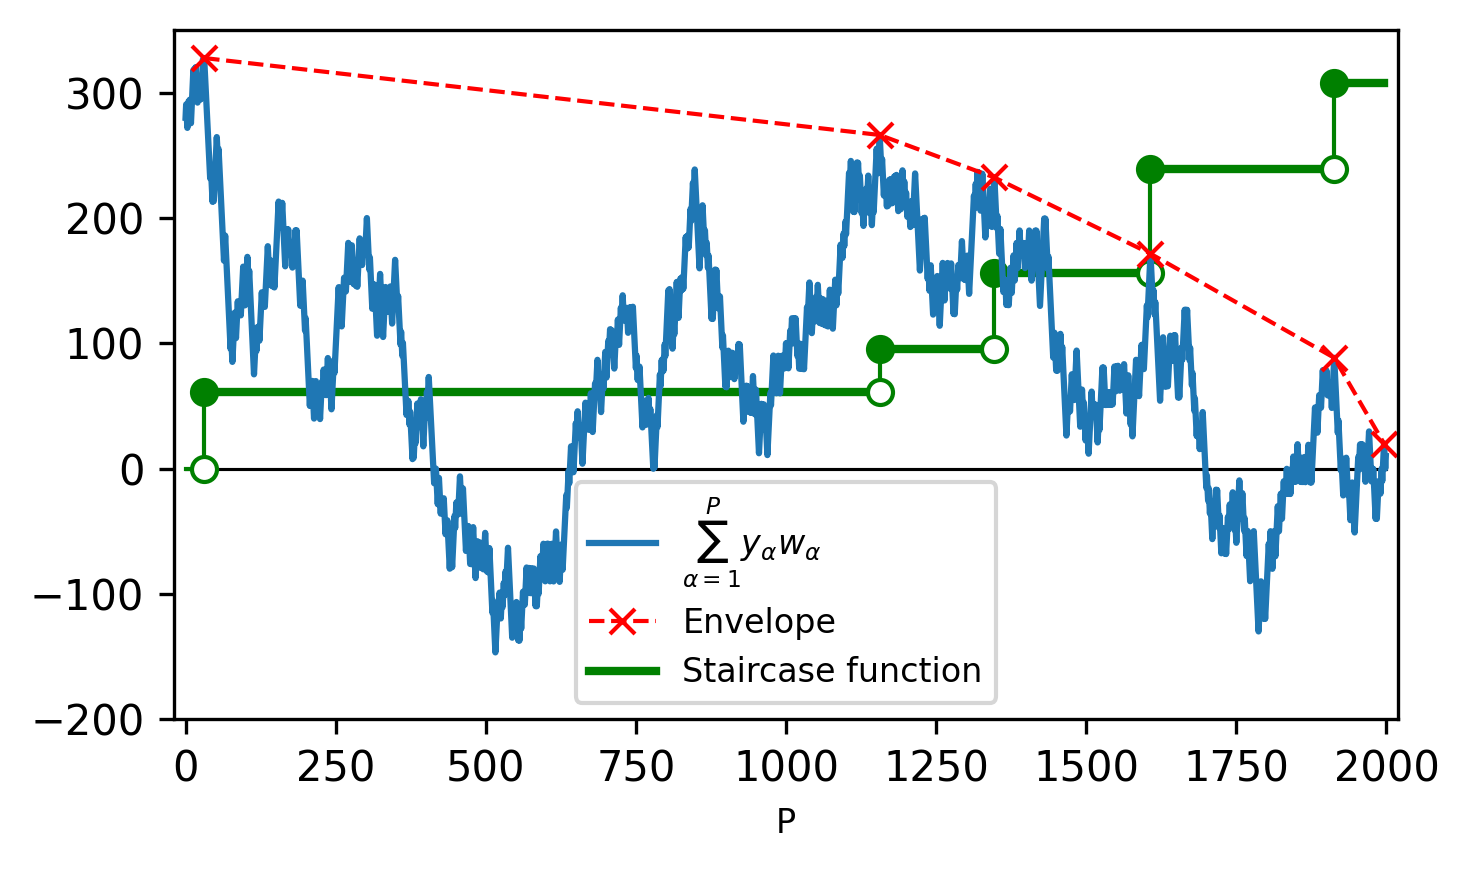

In [4]:
plt.figure(figsize=(5,3), dpi=300)
plt.plot(y, label = r'$\sum_{\alpha = 1}^P y_\alpha w_\alpha$')
plt.plot([0, P], [0, 0], 'k-', lw = .75, zorder = -1)
loc = find_touch_point(y)
plt.plot(loc, [y[i]  for i in loc], 'rx--', lw = 1, label = 'Envelope')
steps = []
for i, loc_ in enumerate(loc[:-1]):
    steps.append(y[loc_] - y[loc[i+1]])
    plt.plot([loc_, loc[i+1]], [sum(steps), sum(steps)], 'g-', lw = 2, zorder = -1, label= 'Staircase function' if i == 0 else None)
    plt.scatter(loc_, sum(steps), marker = 'o', color = 'g')
    if i < len(loc)-2:
        plt.scatter(loc[i+1], sum(steps), facecolors='white', edgecolors='g')
    if i > 0:
        plt.plot([loc_, loc_], [sum(steps[:-1]), sum(steps)], 'g-', lw = 1, zorder = -1)
    if i == 0:
        plt.plot([loc_, loc_], [0, sum(steps)], 'g-', lw = 1, zorder = -1)
        plt.plot([0, loc_], [0, 0], 'g-', lw = 1, zorder = -1)
        plt.scatter(loc_, 0, facecolors='white', edgecolors='g')
plt.xlim(-20, P + 20)
plt.xlabel('P',fontsize = 8)
plt.ylim(-200, 350)
plt.legend(fontsize = 8)
plt.tight_layout()
plt.savefig('twostep.pdf', bbox_inches='tight')